In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

35.54915011710962 -154.5622864610752
66.07037568143681 -131.19750668991196
54.20716283929181 112.27419902783271
-6.403545586056936 -24.305505834831735
-69.5217265099613 63.1859867269483
-35.41234352836391 -82.48148746986462
-75.126108683442 -152.00637206198041
88.47789488228992 43.813882912953716
-40.171774177828325 131.3907850080402
-78.3600139642485 148.22075444115262
-86.19955903285742 160.86054870059462
13.872318384494577 -9.468919754318534
-47.3372775364015 157.48557821891137
-49.99428147947715 44.300578962957076
56.0164986372541 -62.47947653753508
82.97365402470987 -146.84650638927235
35.07353395050053 -85.257963830386
-41.58077818992825 -78.77890649942334
-17.277538921221108 176.1844490206829
7.1028335020890125 55.60417802785443
-50.53122487754143 -80.53664359326271
9.239915998642175 -101.52302673160388
18.3856862817167 -1.6341512370670728
-65.80752223055852 -146.13964624582593
-85.59358642013775 127.64344539886275
15.462859774675223 -66.52340033258528
-24.938969783158498 -135.3

-21.10952523688249 -86.95461292113383
-19.51069262868978 140.60418418983477
-22.76089076380282 -13.907223678416983
-40.18502605757513 -161.88097141289455
-33.024755219606554 -134.36029606013724
6.62422627092225 83.06902094083648
-72.09151310724317 -1.1190992206581143
-51.30867018380699 -60.4200420985527
9.397928543758496 93.63985429996745
69.0157200709865 -32.17332827308249
67.67420269435036 -178.00403102479825
-53.88354835505061 -114.10264934494603
23.571063575949808 111.9953552906731
-30.638644988514955 44.195745190825136
70.34288879014889 164.01115973264007
-1.7667112929162272 -13.021915397040829
5.0202107860601615 48.93455077307743
-67.89637229294213 63.83846447104409
-79.6450758478995 33.181926160769194
40.06206136788987 111.17033415142595
57.748360219830204 -84.98151063325038
-53.71242480634634 -137.9808849120817
54.04044004002105 -171.7462416167795
-41.33460419359106 84.43838286060117
9.054641478622443 -28.651507577206104
12.812037334196816 -1.0602767767210253
-76.31748855995637

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | inuvik
Processing Record 3 of Set 1 | bagdarin
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | port lincoln
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | kita
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 1 | havre-saint-pierre
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | red bank
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | bandarbeyla
Processing Record 21 of Set 1 | coihaique
Processing Record 22 of Set 1 | acapulco
Processing Record 23

Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | warqla
City not found. Skipping...
Processing Record 44 of Set 4 | houma
Processing Record 45 of Set 4 | sorong
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | maldonado
Processing Record 48 of Set 4 | hobyo
Processing Record 49 of Set 4 | hohhot
Processing Record 50 of Set 4 | deep river
Processing Record 1 of Set 5 | meiganga
Processing Record 2 of Set 5 | te anau
Processing Record 3 of Set 5 | tazovskiy
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | muisne
Processing Record 6 of Set 5 | tuktoyaktuk
Processing Record 7 of Set 5 | kirgiz-miyaki
Processing Record 8 of Set 5 | laguna
Processing Record 9 of Set 5 | tasiilaq
Processing Record 10 of Set 5 | phan thiet
Processing Record 11 of Set 5 | killam
Processing Record 12 of Set 5 | skjaerhollen
City not found. Skipping...
Processing Record 13 of Set 5 | mount isa
Processing Record 14 of Set 5 | camana

Processing Record 35 of Set 8 | tecoanapa
Processing Record 36 of Set 8 | tawkar
City not found. Skipping...
Processing Record 37 of Set 8 | mar del plata
Processing Record 38 of Set 8 | eyl
Processing Record 39 of Set 8 | ambrolauri
Processing Record 40 of Set 8 | berbera
Processing Record 41 of Set 8 | winnemucca
Processing Record 42 of Set 8 | sain alto
Processing Record 43 of Set 8 | paramonga
Processing Record 44 of Set 8 | vallenar
Processing Record 45 of Set 8 | kutum
Processing Record 46 of Set 8 | auki
Processing Record 47 of Set 8 | winslow
Processing Record 48 of Set 8 | buin
Processing Record 49 of Set 8 | vestmannaeyjar
Processing Record 50 of Set 8 | pilar
Processing Record 1 of Set 9 | kamenskoye
City not found. Skipping...
Processing Record 2 of Set 9 | saint-augustin
Processing Record 3 of Set 9 | egvekinot
Processing Record 4 of Set 9 | asau
Processing Record 5 of Set 9 | pacific grove
Processing Record 6 of Set 9 | flinders
Processing Record 7 of Set 9 | khandyga
Pro

Processing Record 19 of Set 12 | cruzeiro do sul
Processing Record 20 of Set 12 | upington
Processing Record 21 of Set 12 | lorengau
Processing Record 22 of Set 12 | les herbiers
Processing Record 23 of Set 12 | avallon
Processing Record 24 of Set 12 | paso de carrasco
Processing Record 25 of Set 12 | traverse city
Processing Record 26 of Set 12 | bereda
Processing Record 27 of Set 12 | al
City not found. Skipping...
Processing Record 28 of Set 12 | dobroye
Processing Record 29 of Set 12 | tarakan
Processing Record 30 of Set 12 | suluq
Processing Record 31 of Set 12 | rawson
Processing Record 32 of Set 12 | saleaula
City not found. Skipping...
Processing Record 33 of Set 12 | kenai
Processing Record 34 of Set 12 | paamiut
Processing Record 35 of Set 12 | namatanai
Processing Record 36 of Set 12 | teguldet
Processing Record 37 of Set 12 | mendahara
City not found. Skipping...
Processing Record 38 of Set 12 | la seyne-sur-mer
Processing Record 39 of Set 12 | bairnsdale
Processing Record 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,69.48,99,69,10.42,US,2022-06-17 12:57:07
1,Inuvik,68.3499,-133.7218,59.76,47,40,6.91,CA,2022-06-17 12:57:07
2,Bagdarin,54.4333,113.6000,58.35,74,30,0.78,RU,2022-06-17 12:57:07
3,Georgetown,5.4112,100.3354,81.95,92,40,5.01,MY,2022-06-17 12:55:04
4,Lebu,-37.6167,-73.6500,50.25,88,87,5.95,CL,2022-06-17 12:57:08
5,Mataura,-46.1927,168.8643,35.47,98,11,1.52,NZ,2022-06-17 12:57:08
6,Port Lincoln,-34.7333,135.8667,56.93,72,0,14.85,AU,2022-06-17 12:57:08
7,Hobart,-42.8794,147.3294,47.26,94,75,1.14,AU,2022-06-17 12:52:55
8,Bluff,-46.6000,168.3333,35.80,74,53,11.30,NZ,2022-06-17 12:57:09
9,Kita,13.0349,-9.4895,97.18,31,97,4.92,ML,2022-06-17 12:57:09


In [12]:
# Recall Column names
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [13]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_data_df[new_column_order]
city_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-06-17 12:57:07,22.0752,-159.3190,69.48,99,69,10.42
1,Inuvik,CA,2022-06-17 12:57:07,68.3499,-133.7218,59.76,47,40,6.91
2,Bagdarin,RU,2022-06-17 12:57:07,54.4333,113.6000,58.35,74,30,0.78
3,Georgetown,MY,2022-06-17 12:55:04,5.4112,100.3354,81.95,92,40,5.01
4,Lebu,CL,2022-06-17 12:57:08,-37.6167,-73.6500,50.25,88,87,5.95


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

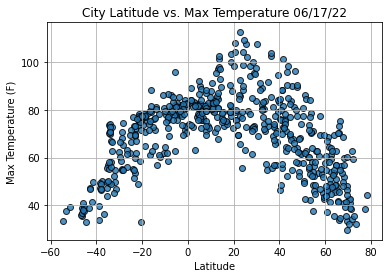

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

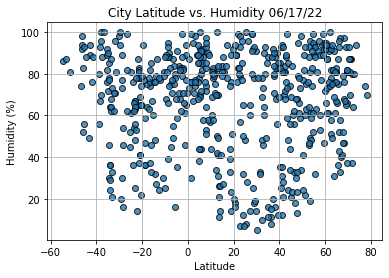

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

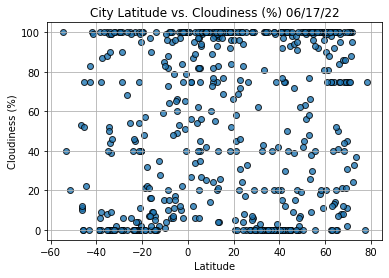

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

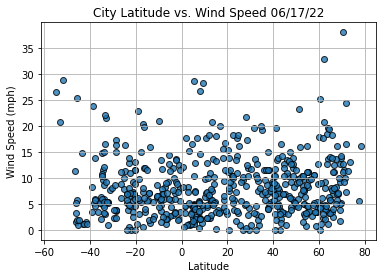

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                     Red Bank
Lat                       40.3471
Lng                      -74.0643
Max Temp                    76.14
Humidity                       85
Cloudiness                    100
Wind Speed                  10.36
Country                        US
Date          2022-06-17 12:52:54
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
555    False
556     True
557     True
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,69.48,99,69,10.42,US,2022-06-17 12:57:07
1,Inuvik,68.3499,-133.7218,59.76,47,40,6.91,CA,2022-06-17 12:57:07
2,Bagdarin,54.4333,113.6000,58.35,74,30,0.78,RU,2022-06-17 12:57:07
3,Georgetown,5.4112,100.3354,81.95,92,40,5.01,MY,2022-06-17 12:55:04
9,Kita,13.0349,-9.4895,97.18,31,97,4.92,ML,2022-06-17 12:57:09


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

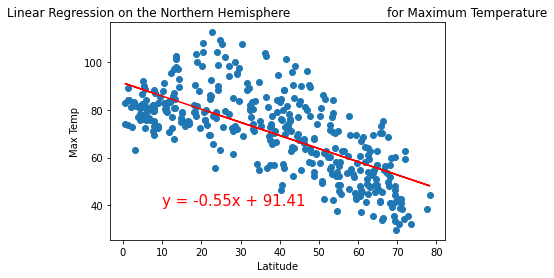

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

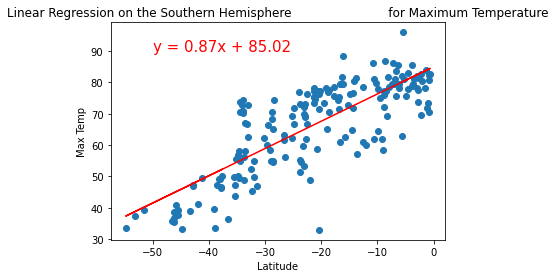

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

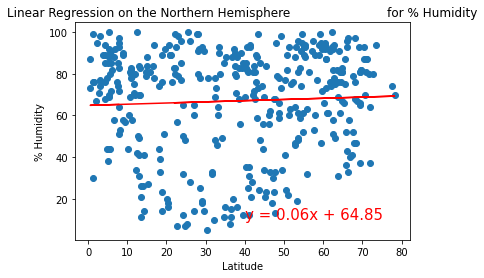

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

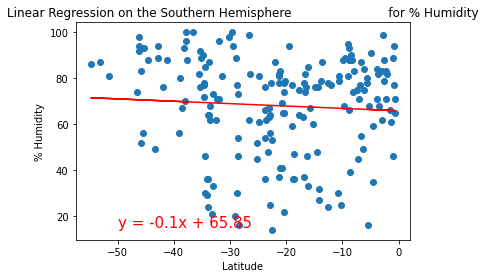

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

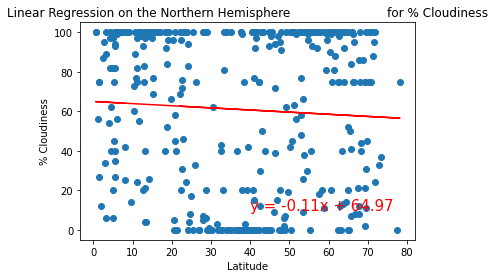

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

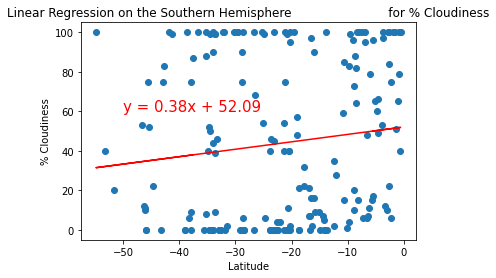

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

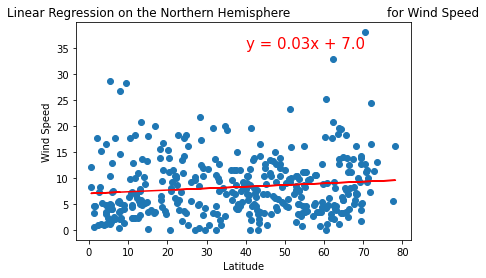

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

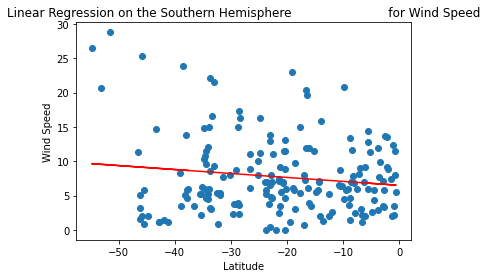

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))